# Google Autocompletion Graphs of Verbs with Referrals
## Moses Boudourides

In [1]:
import requests, ast, operator, math, imp, os, pickle, random, numpy as np, networkx as nx, matplotlib.pyplot as plt  
import nltk
from collections import Counter, OrderedDict, defaultdict
from itertools import combinations
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from ipywidgets import widgets
import warnings
warnings.filterwarnings('ignore')

In [2]:
verbsto=["choose to", "decide to", "expect to", "forget to", "hate to", "hope to", "intend to", "learn to", "like to", "love to", "mean to", "plan to", "prefer to", "remember to", "would like to", "would love to", "arrange to", "attempt to", "fail to", "help to", "manage to", "tend to", "try to", "want to", "advise to", "ask to", "encourage to", "invite to", "order to", "persuade to", "remind to", "tell to", "warn  to", "expect to", "intend to", "would to", "prefer to", "want to", "would like to", "allow to", "enable to", "force to", "get to", "teach to"]
# len(verbsto)

In [3]:
verbstg=["abhor to","acknowledge to","admit to","advise to","allow to","anticipate to","appreciate to","avoid to","be worth to","can’t help to","celebrate to","confess to","consider to","continue to","defend to","delay to","detest to","discontinue to","discuss to","dislike to","dispute to","dread to","endure to","enjoy to","escape to","evade to","explain to","fancy to","fear to","feel like to","feign to","finish to","forgive to","give up to","keep to","keep on to","mention to","mind to","miss to","necessitate to","object to","omit to","permit to","picture to","postpone to","practice to","prevent to","put off to","recall to","recollect to","recommend to","report to","resent to","resist to","resume to","risk to","shirk to","shun to","stop to","suggest to","support to","tolerate to","understand to","urge to","warrant to"]
# len(verbstg)

In [4]:
print len(verbsto), len(verbstg)
verbsto=set(verbsto+verbstg)
len(verbsto)

In [5]:
vv=[]
for w in verbsto:
    vv.append((w,"'"+w+"'"))
for i in vv:
    print i

In [6]:
s1="http://suggestqueries.google.com/complete/search?client=firefox&q="
ss=[]
for i in vv:
    ss.append((s1+i[1],i[0]))
# for i in ss:
#     print i
for i in ss:
    print i[1]
    r=requests.get(i[0])
    x1 = ast.literal_eval(r.text)
    print x1[1]

In [7]:
ad0={}
for i in ss:
    r=requests.get(i[0])
    x1 = ast.literal_eval(r.text)
    ad0[i[1]]=x1[1]
#     if i[1].count(" ")==1:
#         ad[i[1].split(" ")[0]]=x1[1]
#     elif i[1].count(" ")>1:
#         ad[i[1].replace("  "," ").replace(" to","")]=x1[1]
print len(ad0)
for k,v in ad0.items():
    print k,v

In [8]:
print (len(ad0.keys())), (len(set(ad0.keys())))
sorted(ad0.keys())

In [9]:
ad1={}
for k,v in ad0.items():
    if k.count(" ")==1:
        ad1[k.split(" ")[0]]=v
    elif k.count(" ")>1:
        ad1[k.replace("  "," ").replace(" to","")]=v
print len(ad1)
print
for k,v in ad1.items():
    print k
    print v
    print

In [10]:
from nltk.corpus import stopwords
stop_words=list(stopwords.words('english'))+['ing','eating','10',
 '1187','12','1995','2','2.0','2015','2017','2018','2019','2fa','3',
 '300','4','4runner','5','50409','6','76','8','___',
 'c#','can\\u0027t','children\\u0027s','dates','de','detectchanges',
 'i\\u0027m','it\\u0027s','kua\\u0027fon','mn','non-property-list',
 'ones','support.toshiba.com','taking','to\\u0027s','to_s','worlds',
 'x','xr','choose','consider','continue','forget','hate','help','keep',
 'learn','like','love','mention','mind','object','order','permit',
 'recall','remember','try','would']

ad2={}
tt=[]
for k,v in ad1.items():
    t=[]
    for vv in v:
        for w in vv.split(" "):
            if w!=k:
                if w not in stop_words:
                    if w not in t:
                        t.append(w)
    ad2[k]=t
    print k,t
    for s in t:
        tt.append(s)
    print

In [11]:
print (len(tt)),len(set(tt))
sorted(set(tt))

In [12]:
ints=set(ad1.keys()).intersection(set(tt))
print len(ints)
ints

In [13]:
print len(ad2)
for k,v in ad2.items():
    print k,v

In [14]:
with open('ad2.pic', 'wb') as handle:
    pickle.dump(ad2, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('ad2.pic', 'rb') as handle:
    ad2 = pickle.load(handle)
    
print len(ad2)
for k,v in ad2.items():
    print k,v

102
forget ['breathe', 'lyrics', 'tomorrow', 'take', 'prilosec', 'mudvayne', 'band', 'eat']
necessitate ['malayalam', 'use', 'synonym', 'gun', 'rack', 'conjugation', 'something', 'sentence']
fear ['town', 'usa', 'tread', 'haunted', 'house', 'toxin', 'seekonk', 'tour', 'freedom', 'sleep']
hate ['see', 'heart', 'break', 'lyrics', 'say', 'wait', 'movies', 'books', 'heartbreak', 'chords', 'feel']
help ['buy', 'isa', 'calculator', 'save', 'london', 'equity', 'loan', 'south', 'scotland', 'mortgage', 'halifax']
acknowledge ['acknowledgement', 'country', 'someone', 'received', 'mail', 'offer', 'letter', 'wording', 'teacher', 'email', 'god', 'spanish']
explain ['total', 'quality', 'management', 'torque', 'topology', 'us', 'someone', 'hindi', 'five']
choose ['happy', 'quotes', 'shine', 'move', 'save', 'note', 'guide', 'nice', 'reuse', 'change']
dislike ['max', 'crossword', 'towards', 'tomatoes', 'touch', 'ratio', 'clue']
warrant ['tour', 'satisfy', 'judgment', 'nj', 'toulmin', 'model', 'seize', 

In [27]:
import csv

with open('GACverbs.csv', 'wb') as output:
    writer = csv.writer(output)
    for key, value in ad2.iteritems():
        writer.writerow([key, value])

In [15]:
verbs=sorted(ad2.keys())
print len(verbs)
verbs

102


['abhor',
 'acknowledge',
 'admit',
 'advise',
 'allow',
 'anticipate',
 'appreciate',
 'arrange',
 'ask',
 'attempt',
 'avoid',
 'be worth',
 'can\xe2\x80\x99t help',
 'celebrate',
 'choose',
 'confess',
 'consider',
 'continue',
 'decide',
 'defend',
 'delay',
 'detest',
 'discontinue',
 'discuss',
 'dislike',
 'dispute',
 'dread',
 'enable',
 'encourage',
 'endure',
 'enjoy',
 'escape',
 'evade',
 'expect',
 'explain',
 'fail',
 'fancy',
 'fear',
 'feel like',
 'feign',
 'finish',
 'force',
 'forget',
 'forgive',
 'get',
 'give up',
 'hate',
 'help',
 'hope',
 'intend',
 'invite',
 'keep',
 'keep on',
 'learn',
 'like',
 'love',
 'manage',
 'mean',
 'mention',
 'mind',
 'miss',
 'necessitate',
 'object',
 'omit',
 'order',
 'permit',
 'persuade',
 'picture',
 'plan',
 'postpone',
 'practice',
 'prefer',
 'prevent',
 'put off',
 'recall',
 'recollect',
 'recommend',
 'remember',
 'remind',
 'report',
 'resent',
 'resist',
 'resume',
 'risk',
 'shirk',
 'shun',
 'stop',
 'suggest',
 '

In [16]:
referrals=[]
for k,v in ad2.items():
    for vv in v:
        if vv not in referrals:
            referrals.append(vv)
referrals=sorted(referrals)
print len(referrals), len(set(referrals))
referrals

699 699


['abohar',
 'acknowledgement',
 'acquire',
 'act',
 'address',
 'adjective',
 'advice',
 'alcohol',
 'allah',
 'allow-top-navigation',
 'alone',
 'already-closed',
 'alteryx',
 'another',
 'antonym',
 'app',
 'apple',
 'apply',
 'appreciation',
 'array',
 'arrest',
 'ascii',
 'asus',
 'athena',
 'audio',
 'authenticate',
 'avengers',
 'baba',
 'baby',
 'bahamas',
 'bail',
 'baja',
 'ban',
 'band',
 'bathinda',
 'bear',
 'become',
 'bed',
 'bees',
 'bhd',
 'biggest',
 'bike',
 'blue',
 'body',
 'boksburg',
 'books',
 'bootstrap',
 'boss',
 'bouquet',
 'bpm',
 'break',
 'breathe',
 'bride',
 'bumper',
 'bureau',
 'burn',
 'business',
 'buy',
 'calculator',
 'calendar',
 'car',
 'card',
 'care',
 'carry',
 'cartoon',
 'cash',
 'cast',
 'cause',
 'certain',
 'chai',
 'challenge',
 'chandigarh',
 'change',
 'charge',
 'cheating',
 'chinese',
 'choppa',
 'chords',
 'christmas',
 'chromebook',
 'claim',
 'clue',
 'code',
 'colleague',
 'collect',
 'come',
 'company',
 'compensation',
 'conclu

In [30]:
eds=[]
for k,v in ad2.items():
    for vv in v:
        eds.append((k,vv))
G=nx.Graph()
G.add_edges_from(eds)
nas=[]
for a in G.nodes():
    for c in a:
        if ord(c) < 0 or ord(c) > 127:
            if a not in nas:
                nas.append(a)
for x in nas:
    G.remove_node(x)  
G.remove_nodes_from(list(nx.isolates(G)))
Gn=[n for n in G.nodes() if n in verbs]
Ga=[n for n in G.nodes() if n in referrals]
print "The Google Autocomplete graph of %i verbs has" %len(Gn)
print "%i nodes (%i verbs and %i referrals) and" %(len(G.nodes()),len(Gn),len(Ga))
print len(G.edges()), "edges" 
if nx.is_bipartite(G)==True:
    print "This graph is bipartite"
else:
    print "This graph is not bipartite"
if nx.is_connected(G)==True:
    print "This graph is connected"
else:
    print "This graph is not connected and has", nx.number_connected_components(G), "connected components"

The Google Autocomplete graph of 101 verbs has
796 nodes (101 verbs and 695 referrals) and
1052 edges
This graph is bipartite
This graph is connected


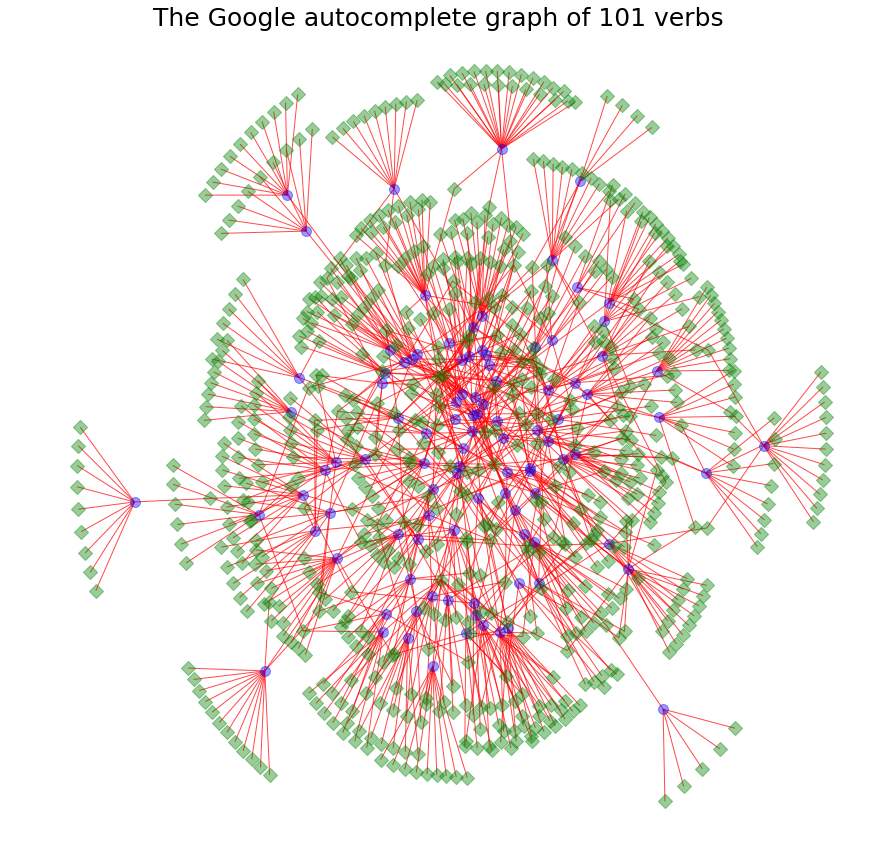

In [31]:
pos=graphviz_layout(G)
labels={}
for n in G.nodes():
    labels[n]=""
fig = plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos=pos,nodelist=Gn,node_color='b',node_size=100,alpha=0.4); 
nx.draw_networkx_nodes(G,pos=pos,nodelist=Ga,node_shape="D",node_color='g',node_size=100,alpha=0.4); 
nx.draw_networkx_edges(G,pos=pos,edge_color='r',alpha=0.7); 
nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=15);
sst="The Google autocomplete graph of %i verbs" %len(Gn)
fig.suptitle(sst,x=0.5, y=.90, fontsize=25);
plt.axis('off');
plt.show()

In [19]:
Gc = nx.Graph(G)
cn=[n for n in Ga if Gc.degree(n)==1] 
Gc.remove_nodes_from(cn)
Gcn=[n for n in Gc.nodes() if n in verbs]
Gca=[n for n in Gc.nodes() if n in referrals]
print "The largest connected component of the Google Autocomplete graph of %i verbs with all referrals having degree larger than 1 has" %len(Gn)
print "%i nodes (%i verbs and %i referrals) and" %(len(Gc.nodes()),len(Gcn),len(Gca))
print len(Gc.edges()), "edges" 
if nx.is_bipartite(Gc)==True:
    print "This graph is bipartite"
else:
    print "This graph is not bipartite"
if nx.is_connected(Gc)==True:
    print "This graph is connected"
else:
    print "This graph is not connected and has", nx.number_connected_components(Gc), "connected components"

The largest connected component of the Google Autocomplete graph of 101 verbs with all referrals having degree larger than 1 has
239 nodes (101 verbs and 138 referrals) and
495 edges
This graph is bipartite
This graph is connected


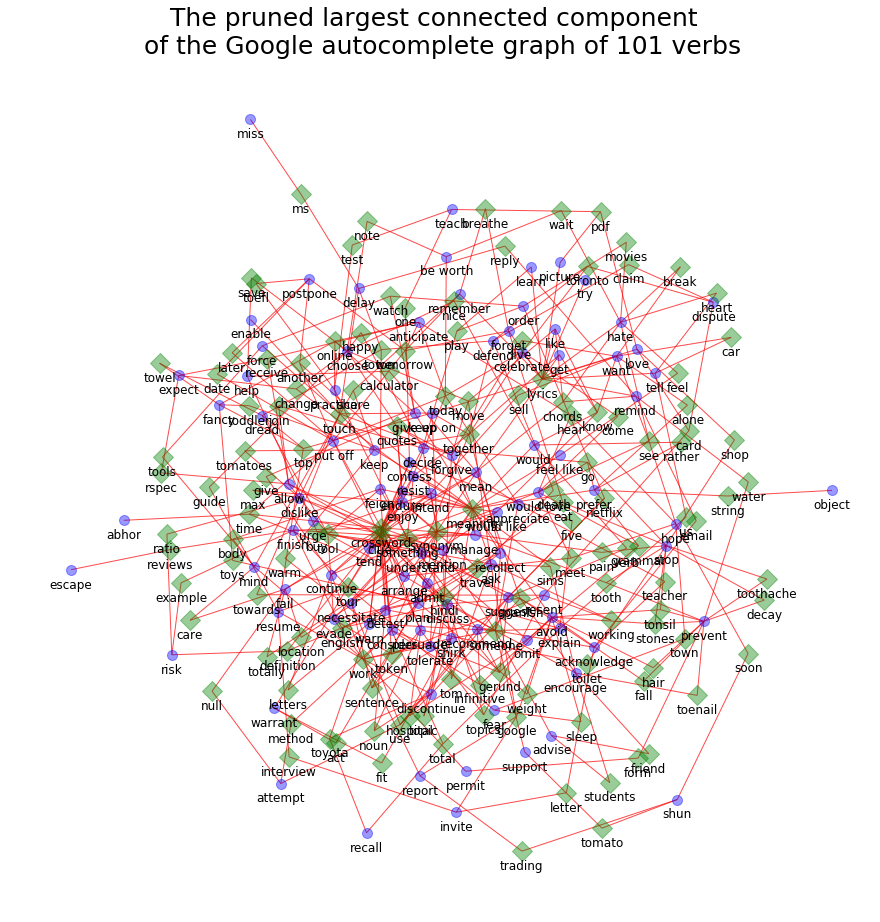

In [20]:
pos=graphviz_layout(Gc)
labels={}
for i in Gc.nodes():
    labels[i]=i
Gcn=[n for n in Gc.nodes() if n in verbs]
Gca=[n for n in Gc.nodes() if n in referrals]

fig = plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(Gc,pos=pos,nodelist=Gcn,node_color='b',node_size=100,alpha=0.4);
nx.draw_networkx_nodes(Gc,pos=pos,nodelist=Gca,node_shape="D",node_color='g',node_size=200,alpha=0.4);
nx.draw_networkx_edges(Gc,pos=pos,edge_color='r',alpha=0.7); #width=edgewidth,
sst="The pruned largest connected component \n of the Google autocomplete graph of %i verbs" %len(Gn)
fig.suptitle(sst,x=0.5, y=.95, fontsize=25);
plt.axis('off');
yoffset = {}
y_off = -14 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
font_size=15
nx.draw_networkx_labels(Gc, yoffset);
plt.show()

In [21]:
verbs_sample = sorted(random.sample(verbs,20))
sorted(verbs_sample)

['advise',
 'anticipate',
 'appreciate',
 'ask',
 'detest',
 'dread',
 'enjoy',
 'feel like',
 'feign',
 'hate',
 'like',
 'mean',
 'object',
 'omit',
 'recall',
 'resist',
 'shirk',
 'teach',
 'urge',
 'warrant']

In [22]:
ad2s={k:v for k,v in ad2.items() if k in verbs_sample}
eds=[]
for k,v in ad2s.items():
    for vv in v:
        eds.append((k,vv))
G=nx.Graph()
G.add_edges_from(eds)
nas=[]
for a in G.nodes():
    for c in a:
        if ord(c) < 0 or ord(c) > 127:
            if a not in nas:
                nas.append(a)
for x in nas:
    G.remove_node(x)  
G.remove_nodes_from(list(nx.isolates(G)))
Gn=[n for n in G.nodes() if n in verbs_sample]
Ga=[n for n in G.nodes() if n not in verbs_sample]
print "The Google Autocomplete graph of %i verbs has" %len(Gn)
print "%i nodes (%i verbs and %i referrals) and" %(len(G.nodes()),len(Gn),len(Ga))
print len(G.edges()), "edges" 
if nx.is_bipartite(G)==True:
    print "This graph is bipartite"
else:
    print "This graph is not bipartite"
if nx.is_connected(G)==True:
    print "This graph is connected"
else:
    print "This graph is not connected and has", nx.number_connected_components(G), "connected components"

The Google Autocomplete graph of 20 verbs has
179 nodes (20 verbs and 159 referrals) and
191 edges
This graph is bipartite
This graph is not connected and has 4 connected components


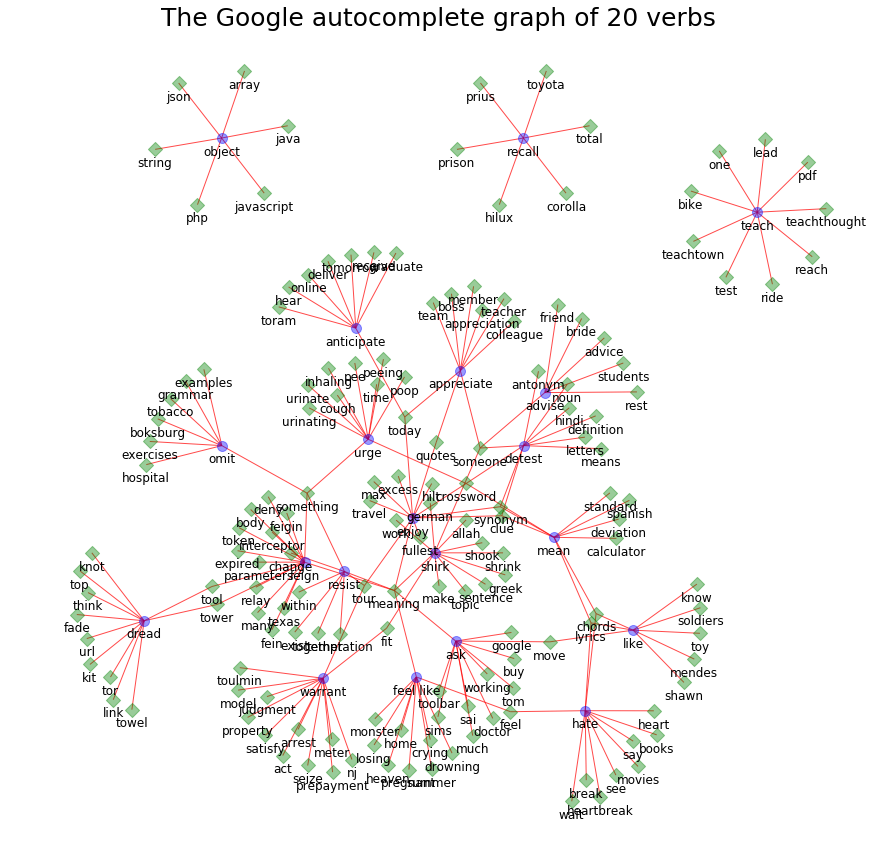

In [23]:
pos=graphviz_layout(G)
fig = plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos=pos,nodelist=Gn,node_color='b',node_size=100,alpha=0.4); 
nx.draw_networkx_nodes(G,pos=pos,nodelist=Ga,node_shape="D",node_color='g',node_size=100,alpha=0.4); 
nx.draw_networkx_edges(G,pos=pos,edge_color='r',alpha=0.7); 
# nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=15);
sst="The Google autocomplete graph of %i verbs" %len(Gn)
fig.suptitle(sst,x=0.5, y=.90, fontsize=25);
plt.axis('off');
yoffset = {}
y_off = -16 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
font_size=15
nx.draw_networkx_labels(G, yoffset);
plt.show()

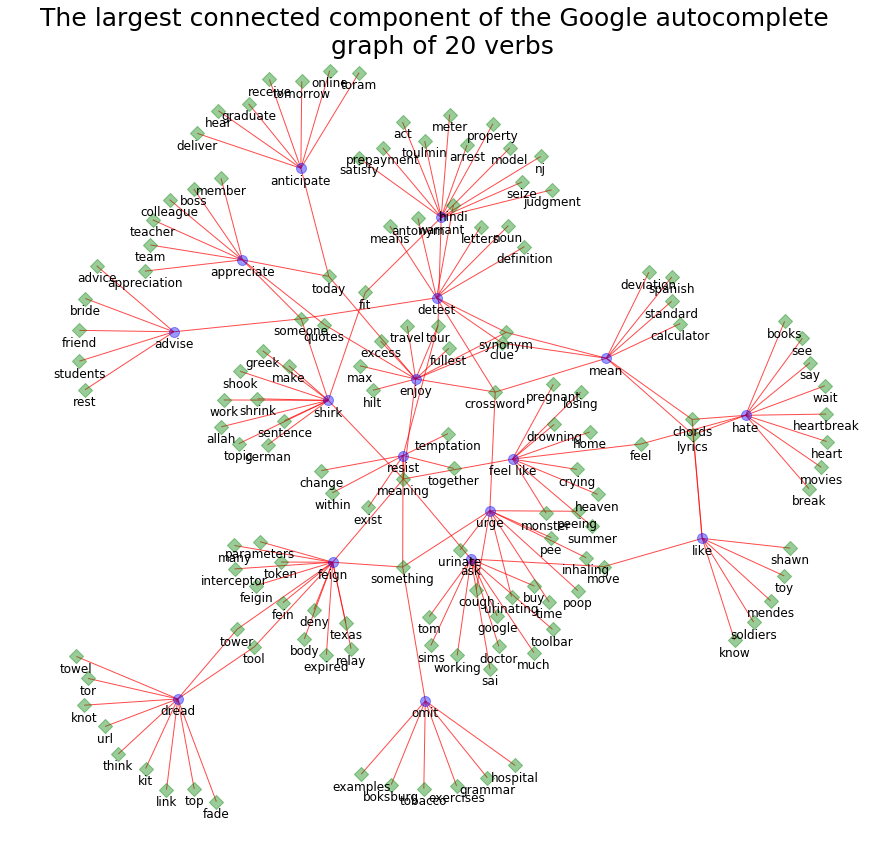

In [24]:
Gg = max(nx.connected_component_subgraphs(G), key=len)
pos=graphviz_layout(Gg)
Ggn=[n for n in Gg.nodes() if n in verbs_sample]
Gga=[n for n in Gg.nodes() if n not in verbs_sample]
fig = plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(Gg,pos=pos,nodelist=Ggn,node_color='b',node_size=100,alpha=0.4); #font_size=20,
nx.draw_networkx_nodes(Gg,pos=pos,nodelist=Gga,node_shape="D",node_color='g',node_size=100,alpha=0.4); font_size=20,
nx.draw_networkx_edges(Gg,pos=pos,edge_color='r',alpha=0.7); 
# nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=15);
sst="The largest connected component of the Google autocomplete \n graph of %i verbs" %len(Gn)
fig.suptitle(sst,x=0.5, y=.90, fontsize=25);
plt.axis('off');
yoffset = {}
y_off = -12 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
font_size=15
nx.draw_networkx_labels(Gg, yoffset);
plt.show()

In [25]:
Gc = nx.Graph(Gg)
cn=[n for n in Gga if Gc.degree(n)==1] 
Gc.remove_nodes_from(cn)
Gcn=[n for n in Gc.nodes() if n in verbs_sample]
Gca=[n for n in Gc.nodes() if n not in verbs_sample]
print "The largest connected component of the Google Autocomplete graph of %i verbs with all referrals having degree larger than 1 has" %len(Gn)
print "%i nodes (%i nationalities and %i referrals) and" %(len(Gc.nodes()),len(Gcn),len(Gca))
print len(Gc.edges()), "edges" 
if nx.is_bipartite(Gc)==True:
    print "This graph is bipartite"
else:
    print "This graph is not bipartite"
if nx.is_connected(Gc)==True:
    print "This graph is connected"
else:
    print "This graph is not connected and has", nx.number_connected_components(Gc), "connected components"

The largest connected component of the Google Autocomplete graph of 20 verbs with all referrals having degree larger than 1 has
33 nodes (17 nationalities and 16 referrals) and
48 edges
This graph is bipartite
This graph is connected


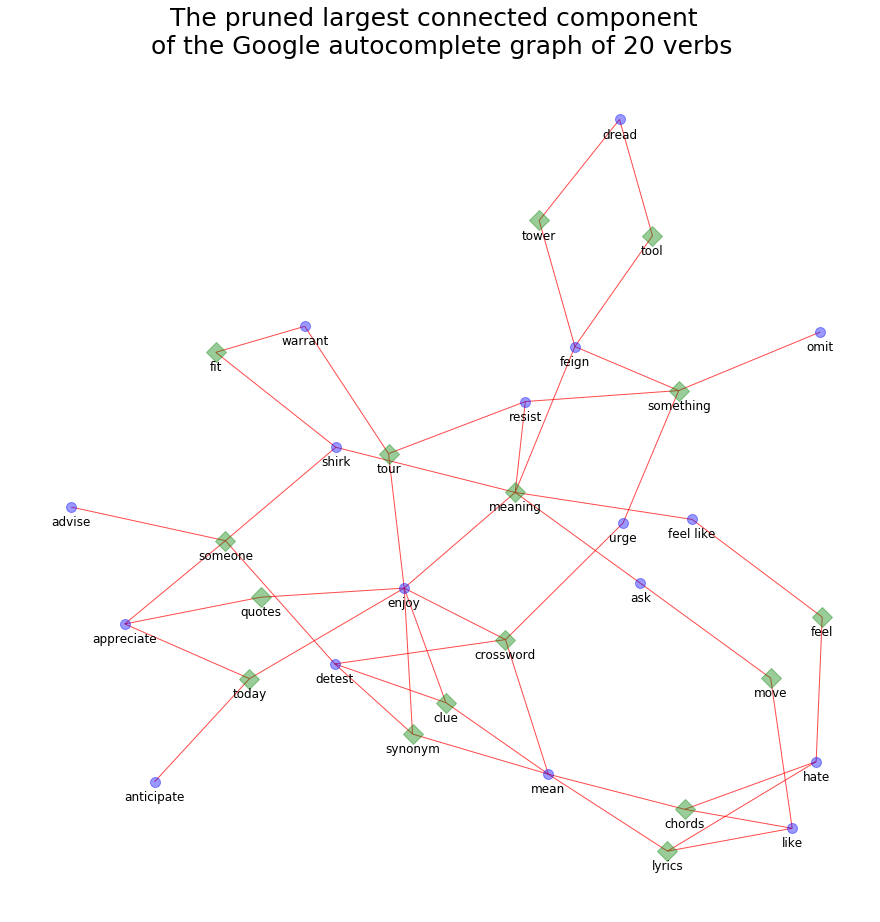

In [26]:
pos=graphviz_layout(Gc)
labels={}
for i in Gc.nodes():
    labels[i]=i
Gcn=[n for n in Gc.nodes() if n in verbs_sample]
Gca=[n for n in Gc.nodes() if n not in verbs_sample]

fig = plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(Gc,pos=pos,nodelist=Gcn,node_color='b',node_size=100,alpha=0.4);
nx.draw_networkx_nodes(Gc,pos=pos,nodelist=Gca,node_shape="D",node_color='g',node_size=200,alpha=0.4);
nx.draw_networkx_edges(Gc,pos=pos,edge_color='r',alpha=0.7); #width=edgewidth,
sst="The pruned largest connected component \n of the Google autocomplete graph of %i verbs" %len(Gn)
fig.suptitle(sst,x=0.5, y=.95, fontsize=25);
plt.axis('off');
yoffset = {}
y_off = -10 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
font_size=15
nx.draw_networkx_labels(Gc, yoffset);
plt.show()